# Random Forest, Penguins DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my
from sklearn.tree import DecisionTreeClassifier

In [2]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: c:\workspace\flyai\week 1\penguins.csv

  0%|          | 0.00/2.77k [00:00<?, ?B/s]
13.8kB [00:00, 16.3MB/s]                   


### 데이터 불러오기

In [3]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 데이터 전처리

#### 결측치 확인

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
!pip install missingno

### missingno

<AxesSubplot: >

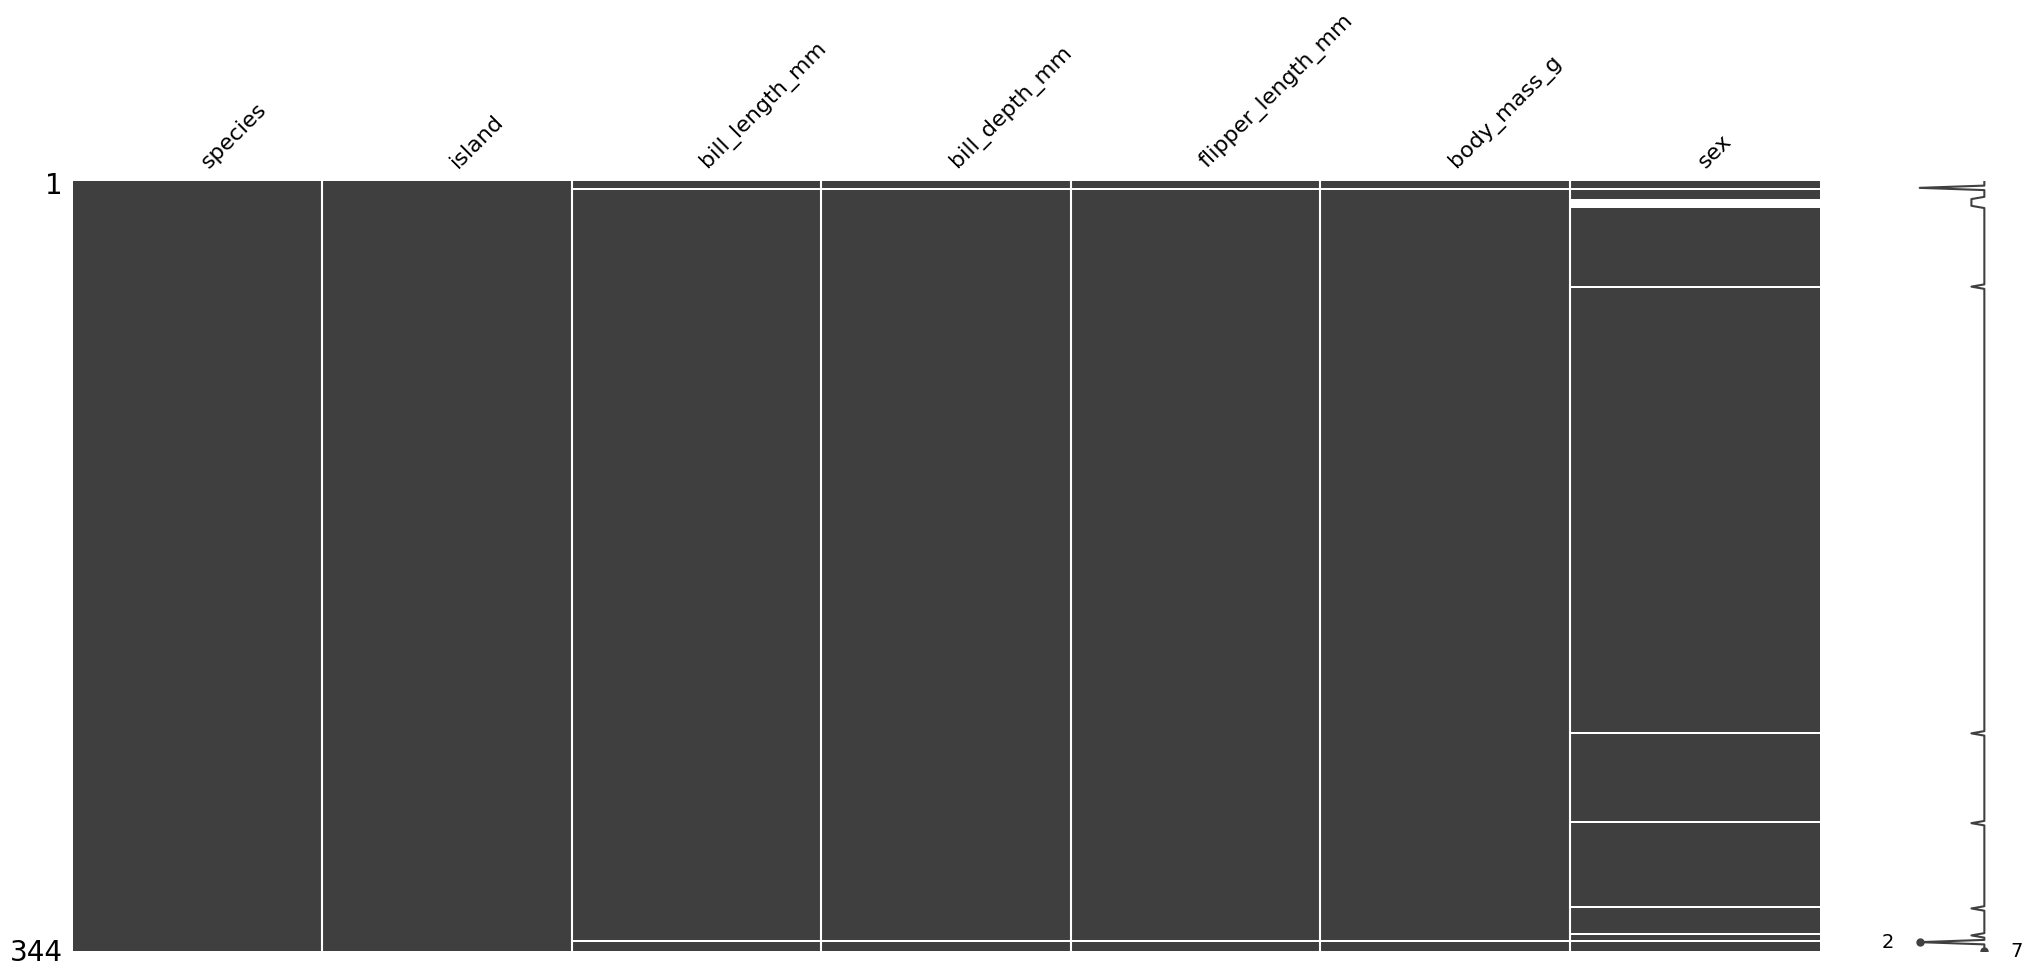

In [6]:
import missingno as msno

msno.matrix(penguins)

In [7]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
penguins.loc[penguins['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


#### 위 두개의 raw만 drop하기

In [9]:
# 해당 컬럼에 null값인 raw만 제거
df = penguins.dropna(subset=['bill_length_mm'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


##### msno 매트릭스로 다시확인

<AxesSubplot: >

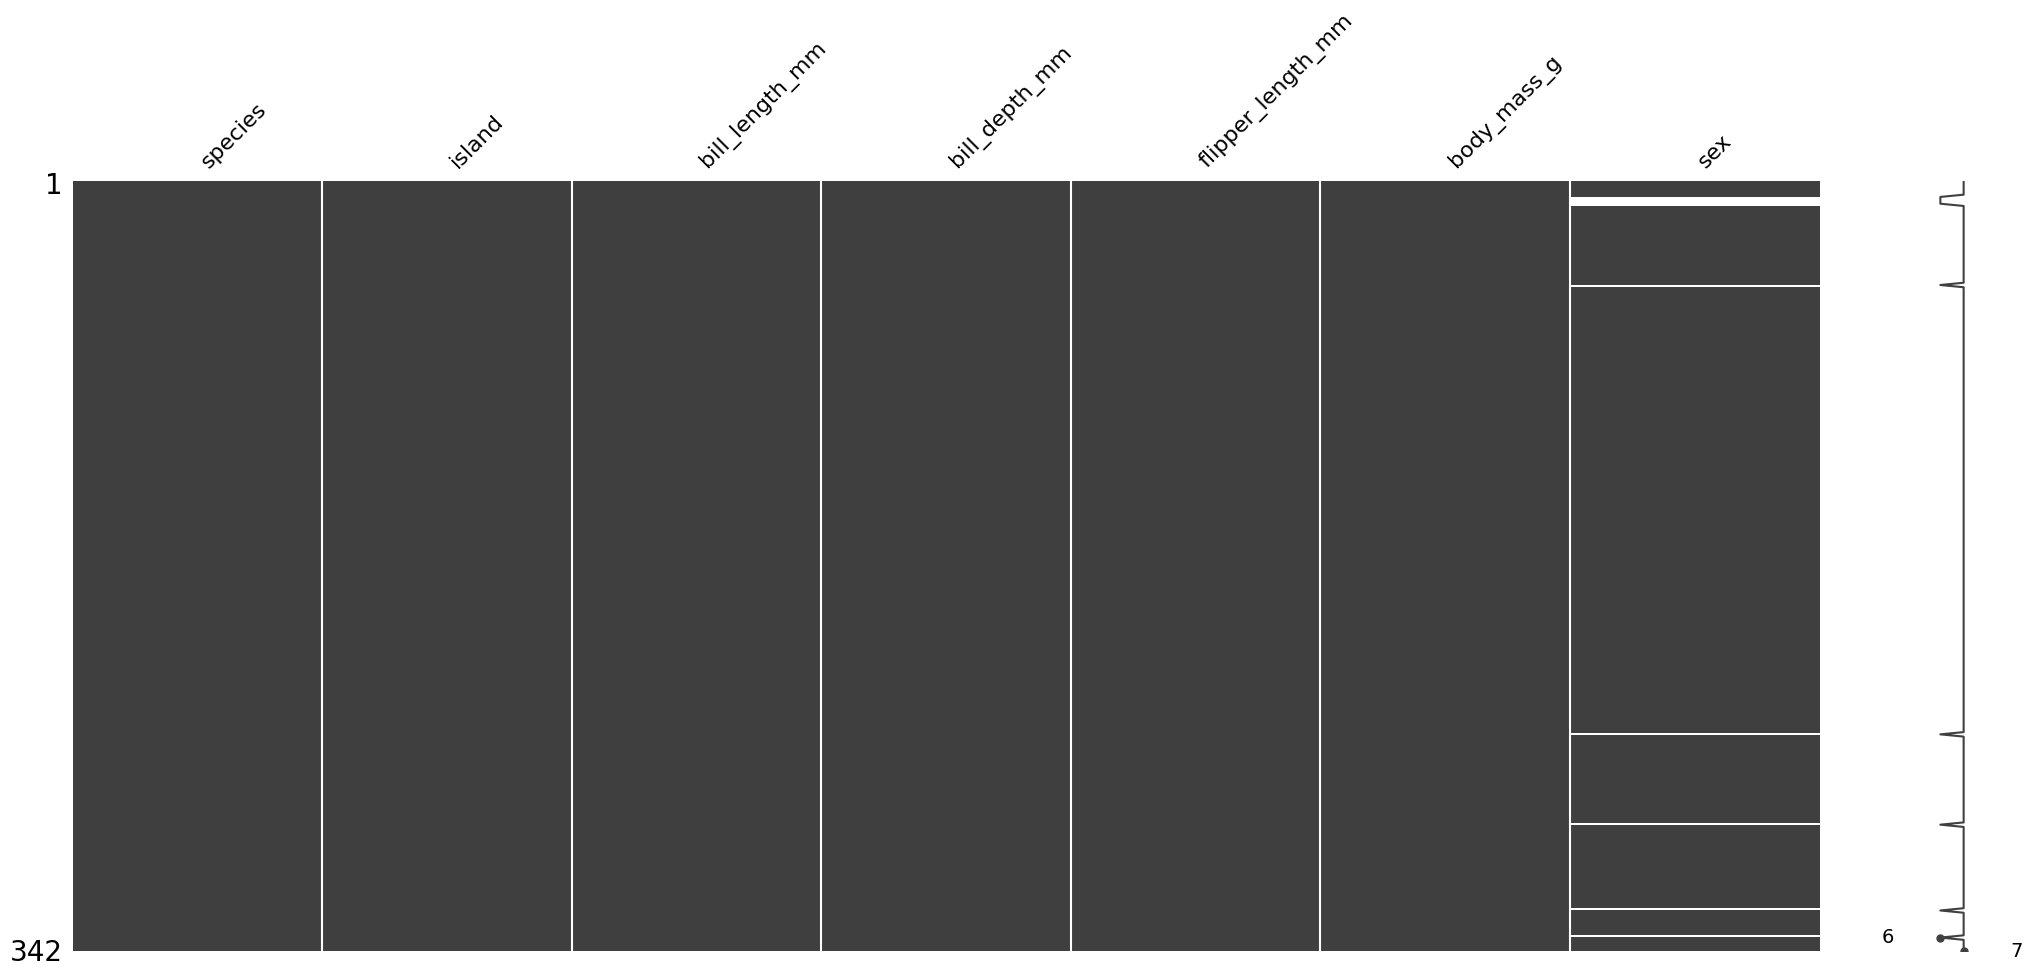

In [10]:
msno.matrix(df)

#### 펭귄 성별 count

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

#### 성별 null 개수 확인

In [12]:
df['sex'].isnull().sum()

9

#### null값 채워주기 fillna()

In [13]:
df['sex'].fillna('NONE', inplace = True)

# df['sex'] = df['sex'].fillna('NONE')

C:\Users\014\AppData\Local\Temp\ipykernel_5488\2788560596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].fillna('NONE', inplace = True)


In [14]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

### 인코딩

In [15]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


##### X, y 분리

In [16]:
X = df.drop(['species'], axis=1)
y = df['species']

##### 인코딩

In [17]:
X['island'].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [18]:
# # df['island'] = df['island'].map({
# #    'Biscoe' : 0,
# #    'Dream' : 1,
# #    'Torgersen' : 2
# # })
# #
# df['sex'] = df['sex'].map({
#     'MALE' : 0,
#     'FEMALE' : 1,
#     'NONE' : 2
# })

In [19]:
# 강사님 island, sex 인코딩
# sklearn의 label 인코딩 함수
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['island'] = encoder.fit_transform(X['island'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,MALE
1,2,39.5,17.4,186.0,3800.0,FEMALE
2,2,40.3,18.0,195.0,3250.0,FEMALE
4,2,36.7,19.3,193.0,3450.0,FEMALE
5,2,39.3,20.6,190.0,3650.0,MALE


In [20]:
sex_encoder = LabelEncoder()
X['sex'] = encoder.fit_transform(X['sex'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2022)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(273, 6) (69, 6)
(273,) (69,)


In [22]:
feature_name = X_train.columns
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [23]:
# numpy array 형태로 전환(스케일링)
X_train = X_train.values
y_train = y_train.values

#### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth = 3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [25]:
clf.score(X_train, y_train)

0.989010989010989

#### feature_importances_ 구하기

In [26]:
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [27]:
clf.feature_importances_

array([0.1029806 , 0.34853826, 0.18673644, 0.22372566, 0.13763099,
       0.00038805])

In [28]:
# columns의 중요성 파악

sr = pd.Series(clf.feature_importances_, index=feature_name)
sr

island               0.102981
bill_length_mm       0.348538
bill_depth_mm        0.186736
flipper_length_mm    0.223726
body_mass_g          0.137631
sex                  0.000388
dtype: float64

In [29]:
# 중요성 내림차순

sr.sort_values(ascending=False)

bill_length_mm       0.348538
flipper_length_mm    0.223726
bill_depth_mm        0.186736
body_mass_g          0.137631
island               0.102981
sex                  0.000388
dtype: float64

#### bill_length_mm 와 bill_depth_mm 컬럼만으로도 분류가능해 보인다.

#### 보고서용 시각화

<AxesSubplot: >

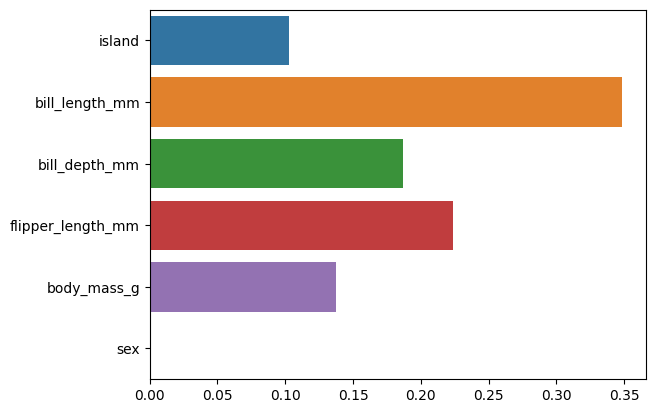

In [30]:
sns.barplot(x=sr, y=sr.index)

### 테스트 데이터로 해보기

In [31]:
clf.score(X_test, y_test)

C:\Users\014\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9420289855072463

In [32]:
y_pred = clf.predict(X_test)
y_pred

C:\Users\014\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap'], dtype=object)

In [33]:
my.precision_score(y_test, y_pred, average='macro')

0.9259259259259259

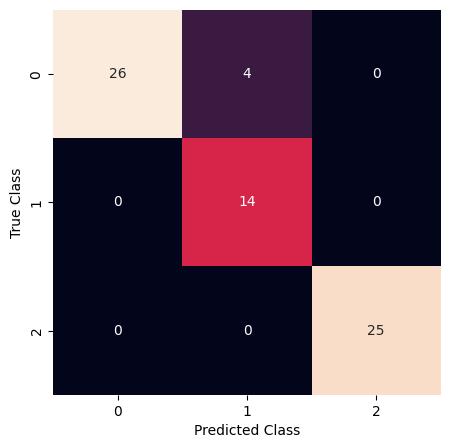

In [34]:
my.plot_confusion_matrix(y_test, y_pred)